# 二重スリットにおける回折・干渉実験の光の強度分布

### 必要なライブラリのインポート

In [1]:
import numpy as np
# 虚数を含む計算に必要
import cmath
# グラフ化用
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 各種設定(単位：mm)

In [2]:
# スリットースクリーン間距離
L = 1.0*10**3
# 光の波長
lam = 6.0*10**(-4)
# スクリーンの初期位置
x_0 = 20.0
# スクリーンの刻み幅
dx = 0.01
# スリット間距離
d = 0.1
# 波数
k = (2*np.pi)/lam

In [3]:
# スクリーンの設定
x_points = np.arange(-x_0, x_0, dx)
# 光の強度分布格納用リスト
I_points = []

### 波の重ね合わせ（繰り返し処理）

In [4]:
# 波の重ね合わせ
for x in x_points:
    # 初期化
    E_1 = 0
    E_2 = 0
    r_1 = np.sqrt(L**2+(x+0.5*d)**2)
    r_2 = np.sqrt(L**2+(x-0.5*d)**2)
    # 電場の計算
    E_1 += cmath.exp(1j*k*r_1)
    E_2 += cmath.exp(1j*k*r_2)
    # ある一点における光の強度計算
    I = np.abs(E_1 + E_2)**2
    # Iの値をリストに格納
    I_points.append(I)

### ヒートマップ作成用の行列生成

In [5]:
# ヒートマップ作成用行列の生成
# 光の強度計算の結果を格納したリスト内の要素数の正方行列を用意し0で初期化
im_I = np.zeros([len(I_points), len(I_points)])

In [6]:
# ヒートマップ作成用行列にI_pointsの値を代入
for i in range(len(I_points)):
    for j in range(len(I_points)):
        im_I[i, j] = I_points[j]

### 光の強度分布のグラフ化

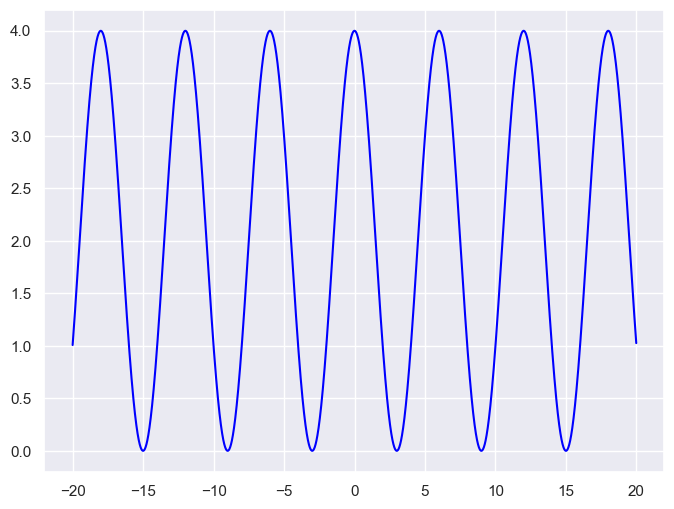

In [7]:
# グラフの各種設定
fig = plt.figure(
    figsize = (8, 6),
    facecolor = "white",
    edgecolor = "black",
)
# グラフの出力位置の設定
ax = fig.add_subplot(1, 1, 1)
# 光の強度分布をプロット
ax.plot(x_points, I_points, '-', label = 'y(t)', color = 'blue', markersize = 0.5)

In [8]:
# グラフの保存
import datetime
import pytz
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)

#見やすい形に変換
time = time.strftime('%m%d_slit_1.png')
# 図の保存
fig.savefig(time, facecolor = fig.get_facecolor())

In [9]:
#heat_I = plt.imshow(im_I, interpolation = "nearest", cmap = plt.cm.gray)
#plt.colorbar(heat_I)

### 光の強度分布に基づいた干渉縞の描画

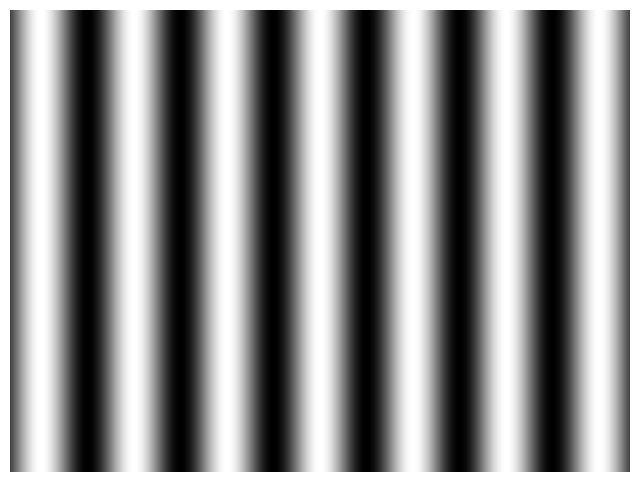

In [10]:
# 光の強度分布に基づいた干渉縞の描画
# 白：明線，黒：暗線
plt.figure(figsize=(8, 6))
splot = sns.heatmap(im_I, xticklabels=False, yticklabels=False, cbar = False, cmap = 'gist_gray')

In [11]:
sfig = splot.get_figure()
sfig.savefig('Interference fringes_1.png', orientation="landscape")